# Machine Learning with Python

## **Import the required libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn import model_selection

# About The Dataset

This dataset contains observations of weather metrics. The dataset includes the following fields:

| Field         | Description                                           | Unit  |
|---------------|-------------------------------------------------------|--------------  |
| Date          | Date of the Observation in YYYY MM DD                 | Date           | 
| MinTemp       | Minimum temperature                                   | Celsius      |   
| MaxTemp       | Maximum temperature                                   | Celsius       |  
| Rainfall      | Amount of rainfall                                    | Millimeters    | 
| Evaporation   | Amount of evaporation                                 | Millimeters     |
| Sunshine      | Amount of bright sunshine                             | hours           |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers per Hour  |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers per Hour  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers per Hour  |
| Humidity9am   | Humidity at 9am                                       | Percent  |
| Humidity3pm   | Humidity at 3pm                                       | Percent  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights  |
| Temp9am       | Temperature at 9am                                    | Celsius  |
| Temp3pm       | Temperature at 3pm                                    | Celsius  |
| RainToday     | If there was rain today                               | Yes or No  |
| RainTomorrow  | If there is rain tomorrow                             | Yes or No  |

#### Import the data

In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv")

#### Visualize the data

In [3]:
df.head(5)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [4]:
df.shape

(3271, 22)

The dataset has 3271 rows or observations and 22 attributes

#### Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

#### NA values

In [6]:
df.isnull().sum()

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Duplicated values

In [7]:
df.duplicated().sum()

0

#### Statistical summary

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000,3271.000000
mean,14.877102,23.005564,3.342158,5.175787,7.168970,41.476307,15.077041,19.294405,68.243962,54.698563,1018.334424,1016.003085,4.318557,4.176093,17.821461,21.543656
std,4.554710,4.483752,9.917746,2.757684,3.815966,10.806951,7.043825,7.453331,15.086127,16.279241,7.020090,7.019915,2.526923,2.411274,4.894316,4.297053
min,4.300000,11.700000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.250000,35.000000,11.000000,15.000000,58.000000,44.000000,1013.700000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,41.000000,15.000000,19.000000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.800000,26.000000,1.400000,7.000000,10.200000,44.000000,20.000000,24.000000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,96.000000,54.000000,57.000000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


### Data Preprocessing

In [9]:
df1=df.select_dtypes(include='object')
for column in df1.columns:
    print(df1[column].unique())

['2/1/2008' '2/2/2008' '2/3/2008' ... '6/23/2017' '6/24/2017' '6/25/2017']
['W' 'NNW' 'WNW' 'ENE' 'NNE' 'NW' 'SSE' 'NE' 'ESE' 'WSW' 'SE' 'SW' 'N' 'E'
 'SSW' 'S']
['S' 'W' 'ESE' 'NNE' 'SSW' 'WNW' 'N' 'SW' 'SE' 'SSE' 'WSW' 'E' 'ENE' 'NW'
 'NNW' 'NE']
['SSW' 'E' 'ESE' 'W' 'ENE' 'S' 'SE' 'SSE' 'NE' 'NNE' 'NNW' 'NW' 'WNW' 'N'
 'WSW' 'SW']
['Yes' 'No']
['Yes' 'No']


Here we can see categorical attributes

#### One Hot Encoding

In [10]:
df1=pd.get_dummies(data=df,columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'],dtype=int)

In [11]:
df1.replace(["Yes","No"],[1,0],inplace=True)

### Split into Features and Y

In [12]:
features=df1.drop(columns=["Date","RainTomorrow"])
features=features.astype(float)

In [13]:
Y=df1["RainTomorrow"].astype(int)

### Training data and Test data

In [14]:
x_train,x_test,y_train,y_test=train_test_split(features,Y,test_size=0.2,random_state=10)

# Models Development

## Linear Regression Model

In [15]:
lm=LinearRegression()

In [16]:
lm.fit(x_train,y_train)

LinearRegression()

In [17]:
y_hat=lm.predict(x_test) #the results are numerical continius values, which is a mistake because we dont know if it´s 1 or 0...

In [18]:
Ev=pd.DataFrame({"Model":"LinearReg","R2":[metrics.r2_score(y_test,y_hat)],"MSE":[metrics.mean_squared_error(y_test,y_hat)],"MAE":[metrics.mean_absolute_error(y_test,y_hat)]})
Ev

,Model,R2,MSE,MAE
0,LinearReg,0.427135,0.11572,0.256316


#### Standardizing data with StandardScaler()

In [19]:
#vamos a probar ahora con normalizado de los datos
scaler=preprocessing.StandardScaler()
x_train_sc=scaler.fit_transform(x_train) #aca busca los parametros y luego transforma
x_test_sc=scaler.transform(x_test) #ya obtenido los parametros no podemos poner fit_transform ya que busca los parametros con el dataset de test, cosa q esta mal, deberiamos tranformarlo con los parametros calculado con el dataset de train

lm1=LinearRegression()
lm1.fit(x_train_sc,y_train)
y_hat1=lm1.predict(x_test_sc)

metrics1=pd.DataFrame({"Model":"LinearReg","R2":[metrics.r2_score(y_test,y_hat1)],"MSE":[metrics.mean_squared_error(y_test,y_hat1)],"MAE":[metrics.mean_absolute_error(y_test,y_hat1)]})
metrics1

,Model,R2,MSE,MAE
0,LinearReg,0.42715,0.115717,0.256315


#### Using Pipelines

In [20]:
pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',LinearRegression())
])

pipe.fit(x_train,y_train)
y_hat=pipe.predict(x_test)

metrics1=pd.DataFrame({"Model":"LinearReg","R2":[metrics.r2_score(y_test,y_hat)],"MSE":[metrics.mean_squared_error(y_test,y_hat)],"MAE":[metrics.mean_absolute_error(y_test,y_hat)]})
metrics1

,Model,R2,MSE,MAE
0,LinearReg,0.42715,0.115717,0.256315


##### Cross Validation

In [21]:
scores=model_selection.cross_val_score(pipe,features,Y,cv=5,scoring='r2')
cross1=scores.mean()

## K-nearest neighbours

In [22]:
k=10
vector_n=[]
precission_list=[]
jaccard_list=[]
f1_score_list=[]

for n in range(1,k):
    pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',KNeighborsClassifier(n_neighbors=n))
    ])
    
    pipe.fit(x_train,y_train)
    y_hat=pipe.predict(x_test)
    
    precission=metrics.accuracy_score(y_test,y_hat)
    precission_list.append(precission)
    
    jaccard=jaccard_score(y_test,y_hat)
    jaccard_list.append(jaccard)
    
    f1=f1_score(y_test,y_hat)
    f1_score_list.append(f1)
    
    vector_n.append(n)

    
    

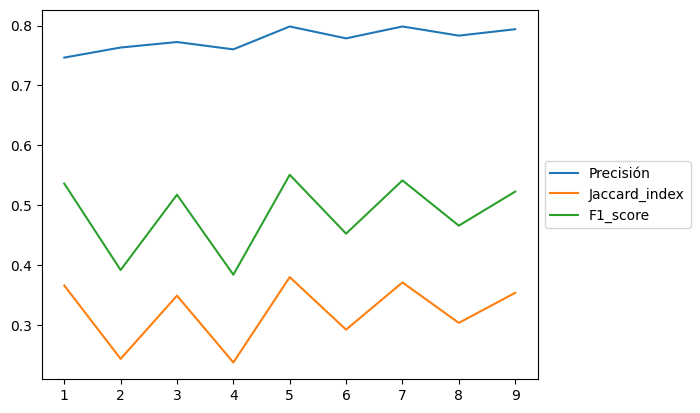

In [23]:
ax1=sns.lineplot(x=vector_n,y=precission_list,label='Precisión')
sns.lineplot(x=vector_n,y=jaccard_list,ax=ax1,label='Jaccard_index')
sns.lineplot(x=vector_n,y=f1_score_list,ax=ax1,label='F1_score')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [24]:
metrics2 = pd.DataFrame({"Model":"KNN",'K':vector_n,'Accuracy': precission_list, 'Jaccard': jaccard_list, 'F1_score':f1_score_list})
metrics2

,Model,K,Accuracy,Jaccard,F1_score
0,KNN,1,0.746565,0.366412,0.536313
1,KNN,2,0.763359,0.243902,0.392157
2,KNN,3,0.772519,0.349345,0.517799
3,KNN,4,0.760305,0.237864,0.384314
4,KNN,5,0.798473,0.380282,0.551020
5,KNN,6,0.778626,0.292683,0.452830
6,KNN,7,0.798473,0.371429,0.541667
7,KNN,8,0.783206,0.303922,0.466165
8,KNN,9,0.793893,0.354067,0.522968


##### Cross Validation

In [25]:
pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',KNeighborsClassifier(n_neighbors=5))
    ])

scores=model_selection.cross_val_score(pipe,features,Y,cv=5)
cross2=scores.mean()

## Decision Tree

In [26]:
features_tree=df.iloc[:,1:21].copy()
features_tree=pd.get_dummies(data=features_tree,columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'],dtype=int) #aca si simplemente sustituimos numeros por las categorias no tendria sentido ya que capaz el arbol toma como la direccion como variable numerica continua y no es asi, por eso hacemos dummy aca
features_tree.replace(["Yes","No"],[1,0],inplace=True) #en el raintoday al ser 2 valores posible, no hay incoveniente en reemplazar por numeros
features_tree=features_tree.astype(float)

Y_tree=df.iloc[:,21].copy()
Y_tree.replace(["Yes","No"],[1,0],inplace=True)

x_train_tree,x_test_tree,y_train_tree,y_test_tree=train_test_split(features_tree,Y_tree,test_size=0.2,random_state=10)

In [27]:
vector_n=[]
precission_list=[]
jaccard_list=[]
f1_score_list=[]
k=10

for n in range(1,k):

    tree_model=DecisionTreeClassifier(criterion='entropy',max_depth = n)
    tree_model.fit(x_train_tree,y_train_tree)
    y_hat=tree_model.predict(x_test_tree)
    
    precission=metrics.accuracy_score(y_test_tree,y_hat)
    precission_list.append(precission)

    jaccard=jaccard_score(y_test_tree,y_hat)
    jaccard_list.append(jaccard)

    f1=f1_score(y_test_tree,y_hat)
    f1_score_list.append(f1)

    vector_n.append(n)
    
metrics3= pd.DataFrame({"Model":"Decision Tree",'Depth':vector_n,'Accuracy': precission_list, 'Jaccard': jaccard_list, 'F1_score':f1_score_list})
metrics3

,Model,Depth,Accuracy,Jaccard,F1_score
0,Decision Tree,1,0.803053,0.361386,0.530909
1,Decision Tree,2,0.803053,0.361386,0.530909
2,Decision Tree,3,0.803053,0.361386,0.530909
3,Decision Tree,4,0.818321,0.480349,0.648968
4,Decision Tree,5,0.815267,0.426540,0.598007
5,Decision Tree,6,0.824427,0.491150,0.658754
6,Decision Tree,7,0.798473,0.445378,0.616279
7,Decision Tree,8,0.795420,0.417391,0.588957
8,Decision Tree,9,0.786260,0.404255,0.575758


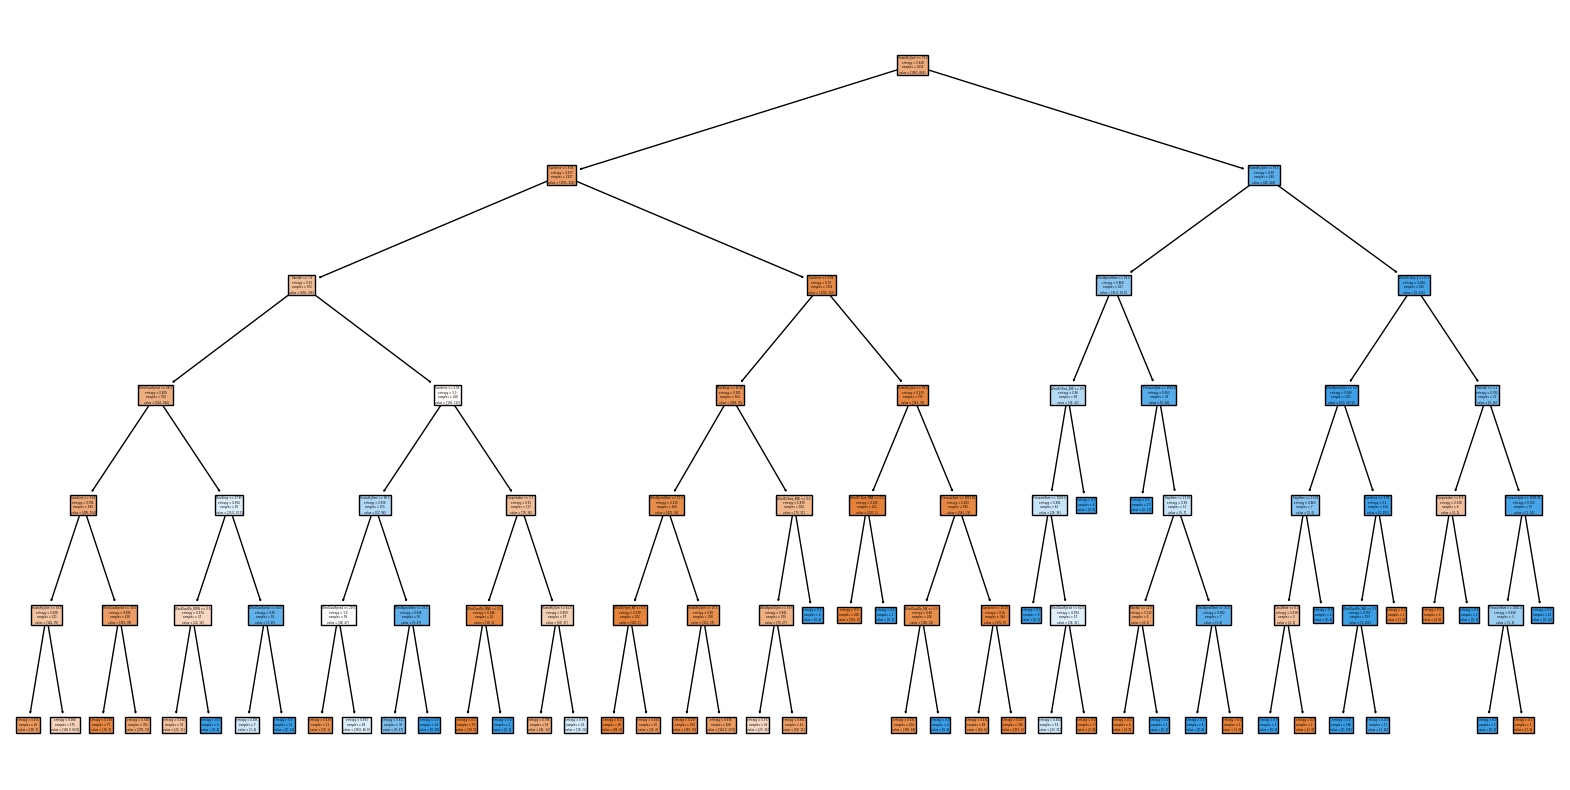

In [28]:
#grafico para n=6 , ya que es donde se obtiene mejor resultado
tree_model=DecisionTreeClassifier(criterion='entropy',max_depth = 6)
tree_model.fit(x_train_tree,y_train)

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=x_train_tree.columns) # feature_names=x_train.columns, porq x_train.columns ya que al modelo lo entrenamo con x_train y le estamos dando los nombres de las columnas con el mismo orden cuando se fiteo, si sacamo esto hace x[i]
plt.savefig("arbol",dpi=300) #con el dpi ajustamos la resolucion
plt.show();

In [29]:
tree_model.classes_ #aca podemos ver las clases, este es el orden que sale en el gráfico

array([0, 1])

In [30]:
tree_model.feature_names_in_ #aca podemos ver los features que es lo mismo que x_train.columns

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N',
       'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW',
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW',
       'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
       'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE',
       'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E',
       'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindD

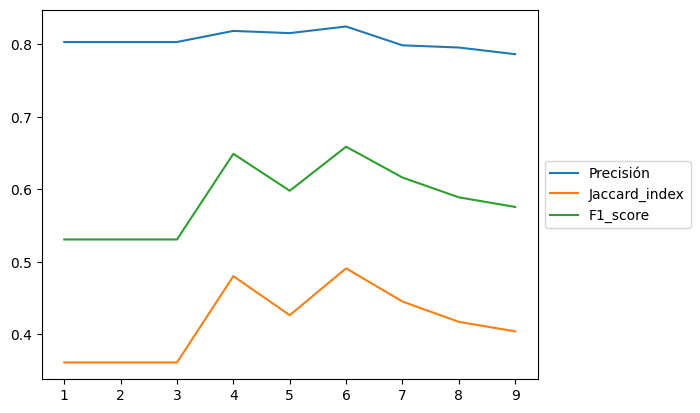

In [31]:
ax1=sns.lineplot(x=vector_n,y=precission_list,label='Precisión')
sns.lineplot(x=vector_n,y=jaccard_list,ax=ax1,label='Jaccard_index')
sns.lineplot(x=vector_n,y=f1_score_list,ax=ax1,label='F1_score')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

##### Cross Validation

In [32]:
pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',DecisionTreeClassifier(criterion='entropy',max_depth = 6))
    ])

scores=model_selection.cross_val_score(pipe,features,Y,cv=5)
cross3=scores.mean()

## Logistic Regression

In [33]:
pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',LogisticRegression(C=0.01, solver='liblinear'))
])

pipe.fit(x_train,y_train)
y_hat=pipe.predict(x_test)

In [34]:
pipe.classes_

array([0, 1])

In [35]:
y_hat_prob=pipe.predict_proba(x_test) #arroja las probabilidades por clase en orden, es decir, [0,1]. [probabilidad de ser de la clase 0, probabilidad de ser de la clase 1]
#y obviamente se escoje el de mayor probabilidad

In [36]:
metrics4 = pd.DataFrame({"Model":"LogReg",'Accuracy': [metrics.accuracy_score(y_test,y_hat)], 'Jaccard': [metrics.jaccard_score(y_test,y_hat)], 'F1_score':[metrics.f1_score(y_test,y_hat)],'Log_loss':[metrics.log_loss(y_test,y_hat_prob)]})
metrics4

,Model,Accuracy,Jaccard,F1_score,Log_loss
0,LogReg,0.845802,0.547085,0.707246,0.373239


##### Cross Validation

In [37]:
pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',LogisticRegression(C=0.01, solver='liblinear'))
    ])

scores=model_selection.cross_val_score(pipe,features,Y,cv=5)
cross4=scores.mean()

##### Confusion Matrix

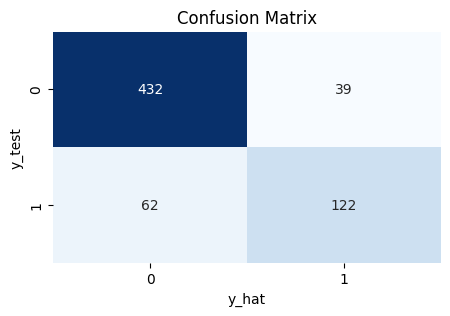

In [38]:
cm = confusion_matrix(y_test,y_hat)

plt.figure(figsize=(5, 3))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('y_hat')
plt.ylabel('y_test')
plt.title('Confusion Matrix');


In [39]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       471
           1       0.76      0.66      0.71       184

    accuracy                           0.85       655
   macro avg       0.82      0.79      0.80       655
weighted avg       0.84      0.85      0.84       655



## SVM

In [40]:
pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',svm.SVC(kernel='linear'))
])

pipe.fit(x_train,y_train)
y_hat=pipe.predict(x_test)

In [41]:
metrics5= pd.DataFrame({"Model":"SVM",'Accuracy': [metrics.accuracy_score(y_test,y_hat)], 'Jaccard': [metrics.jaccard_score(y_test,y_hat)], 'F1_score':[metrics.f1_score(y_test,y_hat)]})
metrics5

,Model,Accuracy,Jaccard,F1_score
0,SVM,0.841221,0.511737,0.677019


##### Cross Validation

In [42]:
pipe=Pipeline([
    ('scaler',preprocessing.StandardScaler()),
    ('model',svm.SVC(kernel='linear'))
    ])

scores=model_selection.cross_val_score(pipe,features,Y,cv=5)
cross5=scores.mean()

##### Confusion Matrix

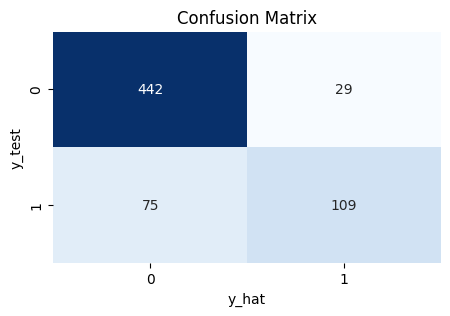

In [43]:
cm = confusion_matrix(y_test,y_hat)

plt.figure(figsize=(5, 3))

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

plt.xlabel('y_hat')
plt.ylabel('y_test')
plt.title('Confusion Matrix');

In [44]:
print(metrics.classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       471
           1       0.79      0.59      0.68       184

    accuracy                           0.84       655
   macro avg       0.82      0.77      0.79       655
weighted avg       0.84      0.84      0.83       655



## Decision Making

In [45]:
cross_values=[cross1,cross2,cross3,cross4,cross5]
df=pd.DataFrame({'Cross_Val_Score':cross_values})    

combined_df = pd.concat([metrics1,metrics2,metrics3,metrics4,metrics5], ignore_index=True).fillna('')
combined_df=combined_df.iloc[[0,5,15,19,20]].reset_index(drop=True)
combined_df=pd.concat([combined_df, df], axis=1)
combined_df

,Model,R2,MSE,MAE,K,Accuracy,Jaccard,F1_score,Depth,Log_loss,Cross_Val_Score
0,LinearReg,0.42715,0.115717,0.256315,,,,,,,0.357630
1,KNN,,,,5.0,0.798473,0.380282,0.55102,,,0.779880
2,Decision Tree,,,,,0.824427,0.49115,0.658754,6.0,,0.808923
3,LogReg,,,,,0.845802,0.547085,0.707246,,0.373239,0.834296
4,SVM,,,,,0.841221,0.511737,0.677019,,,0.835217


<p>Comparing these models, we conclude that <b>the Logistic regression model is the best model</b> to be able to predict the category "RainTomorrow" from our dataset. But if we take into account cross-validation, there is not much difference between the SVM and logistic regression models</p> 